# Customer Segmentation

In [1]:
# import modules
import pandas as pd
from time import time
from joblib import cpu_count
from sklearn.cluster import Birch, MiniBatchKMeans

In [2]:
# read in dataset
df = pd.read_csv('IPEDS_df.csv', low_memory=False)
# set aside institution names
id_df = df.iloc[:, [0, 1]]
# select all numeric features
df = df.select_dtypes(include='number')
# drop any features that are >10% nan
df = df.dropna(
    thresh = round((len(df) * 0.90)),
    axis = 1)
# interpolate remaining nan values with median per feature
df = df.apply(lambda x: x.fillna(x.median()), axis = 0)

## Clustering with Birch

In [3]:
# cluster with sklearn Birch
birch_model = Birch(n_clusters = 25)
t0 = time()
birch_model.fit(df[['LONGITUD', 'LATITUDE']])
t_birch = time() - t0
print("Time to run Birch clustering %0.2f seconds" % t_birch)
df['CLUSTER'] = pd.Series(birch_model.labels_)

Time to run Birch clustering 0.09 seconds


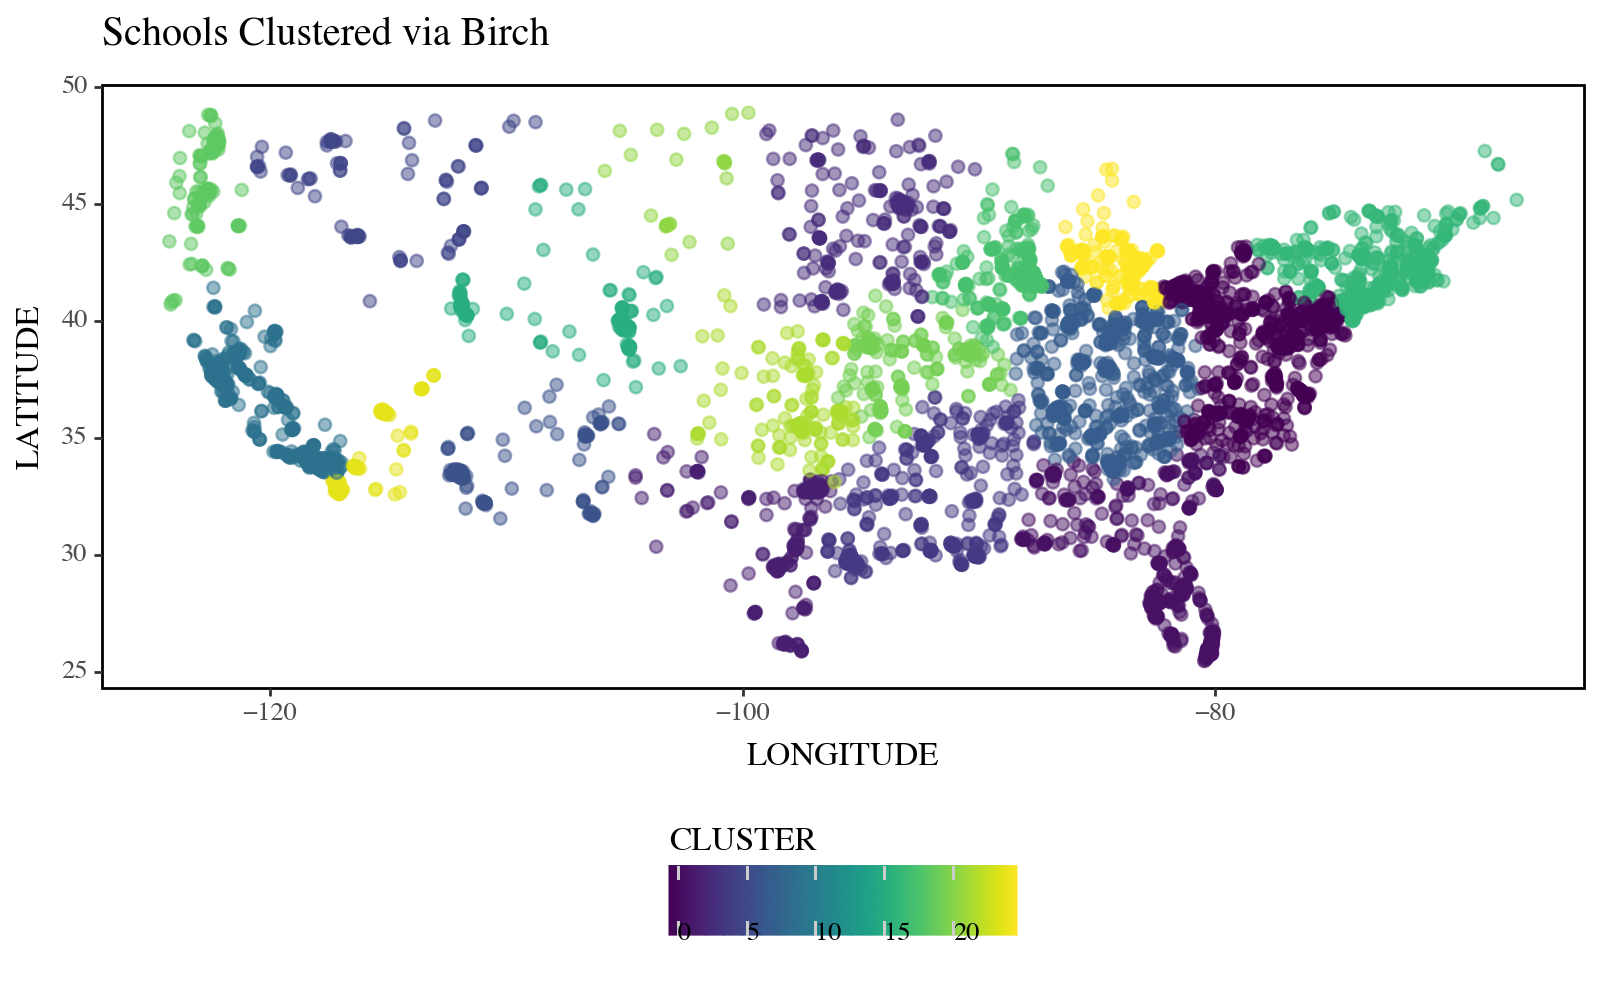

<Figure Size: (800 x 500)>

In [4]:
# visualize clusters
from plotnine import *
plot = (
        ggplot(df[(df['LATITUDE'] >= 25) & (df['LATITUDE'] <= 50)], aes(x = "LONGITUD", y = "LATITUDE", group = 'CLUSTER')) +
        ggtitle("Schools Clustered via Birch") +
        geom_point(aes(color = "CLUSTER"), size = 2, alpha = 0.50) +
        scale_x_continuous(name = "LONGITUDE") +
        scale_y_continuous(name = "LATITUDE") +
        theme_bw(base_family = "Times", base_size=12) +
        theme(panel_grid_major = element_blank(),
              panel_grid_minor = element_blank(),
              panel_border = element_rect(linewidth = 1, color='black'),
              legend_position = 'bottom',
              legend_title = element_text(),
              figure_size = (8, 5)
              )
)
# display the plot
plot

## Clustering with MiniBatchKMeans

In [5]:
# cluster with sklearn MiniBatchKMeans
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters = 25,
    batch_size = 256 * cpu_count(),
    n_init = 10,
    max_no_improvement = 10,
    verbose = 0,
    random_state = 0,
)
t0 = time()
mbk.fit(df[['LONGITUD', 'LATITUDE']])
t_mbk = time() - t0
print("Time to run MiniBatchKMeans clustering %0.2f seconds" % t_mbk)
df['CLUSTER'] = pd.Series(mbk.labels_)

Time to run MiniBatchKMeans clustering 0.22 seconds


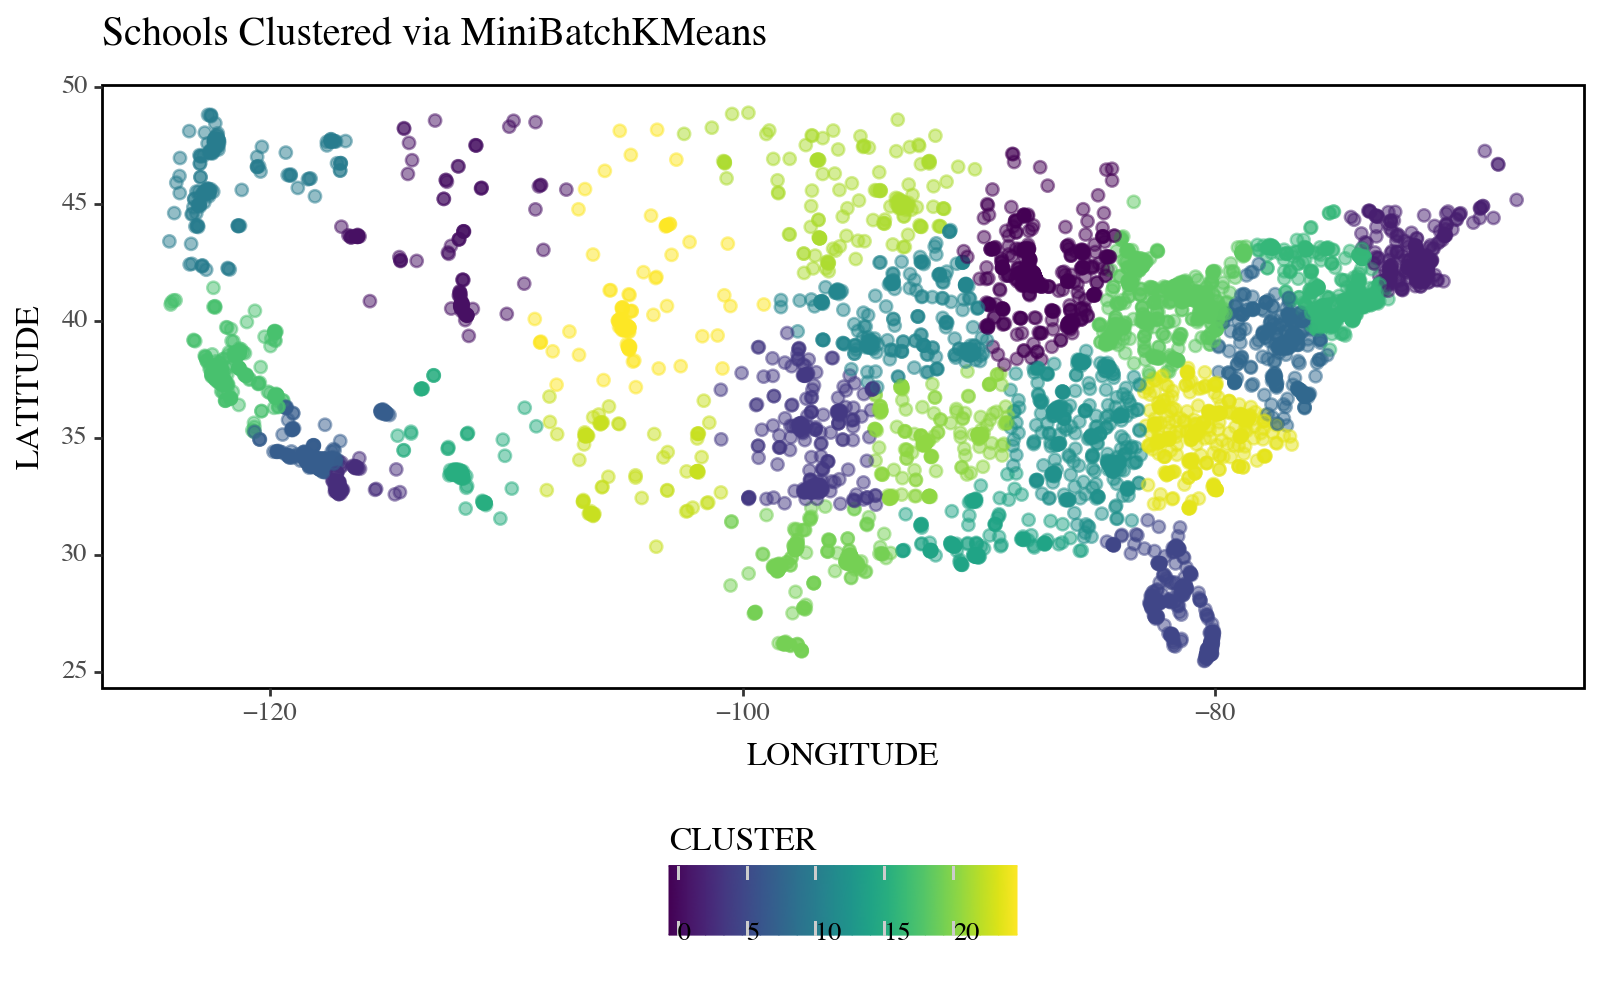

<Figure Size: (800 x 500)>

In [6]:
# visualize clusters
plot = (
        ggplot(df[(df['LATITUDE'] >= 25) & (df['LATITUDE'] <= 50)], aes(x = "LONGITUD", y = "LATITUDE", group = 'CLUSTER')) +
        ggtitle("Schools Clustered via MiniBatchKMeans") +
        geom_point(aes(color = "CLUSTER"), size = 2, alpha = 0.50) +
        scale_x_continuous(name = "LONGITUDE") +
        scale_y_continuous(name = "LATITUDE") +
        theme_bw(base_family = "Times", base_size=12) +
        theme(panel_grid_major = element_blank(),
              panel_grid_minor = element_blank(),
              panel_border = element_rect(linewidth = 1, color='black'),
              legend_position = 'bottom',
              legend_title = element_text(),
              figure_size = (8, 5)
              )
)
# display the plot
plot